### Visualize the map - using networkx library 

#### Libraries

In [ ]:
import geopandas as gpd
import networkx as nx
import matplotlib.pyplot as plt
from math import sqrt
import random


#### Load Data

In [20]:

# === Load GeoJSON ===
file_path = r"C:\Users\Admin\OneDrive - United States International University (USIU)\Desktop\USIU MAp Project\data\combined_cleaned_routes.geojson"
gdf = gpd.read_file(file_path)


#### Visualize the map 

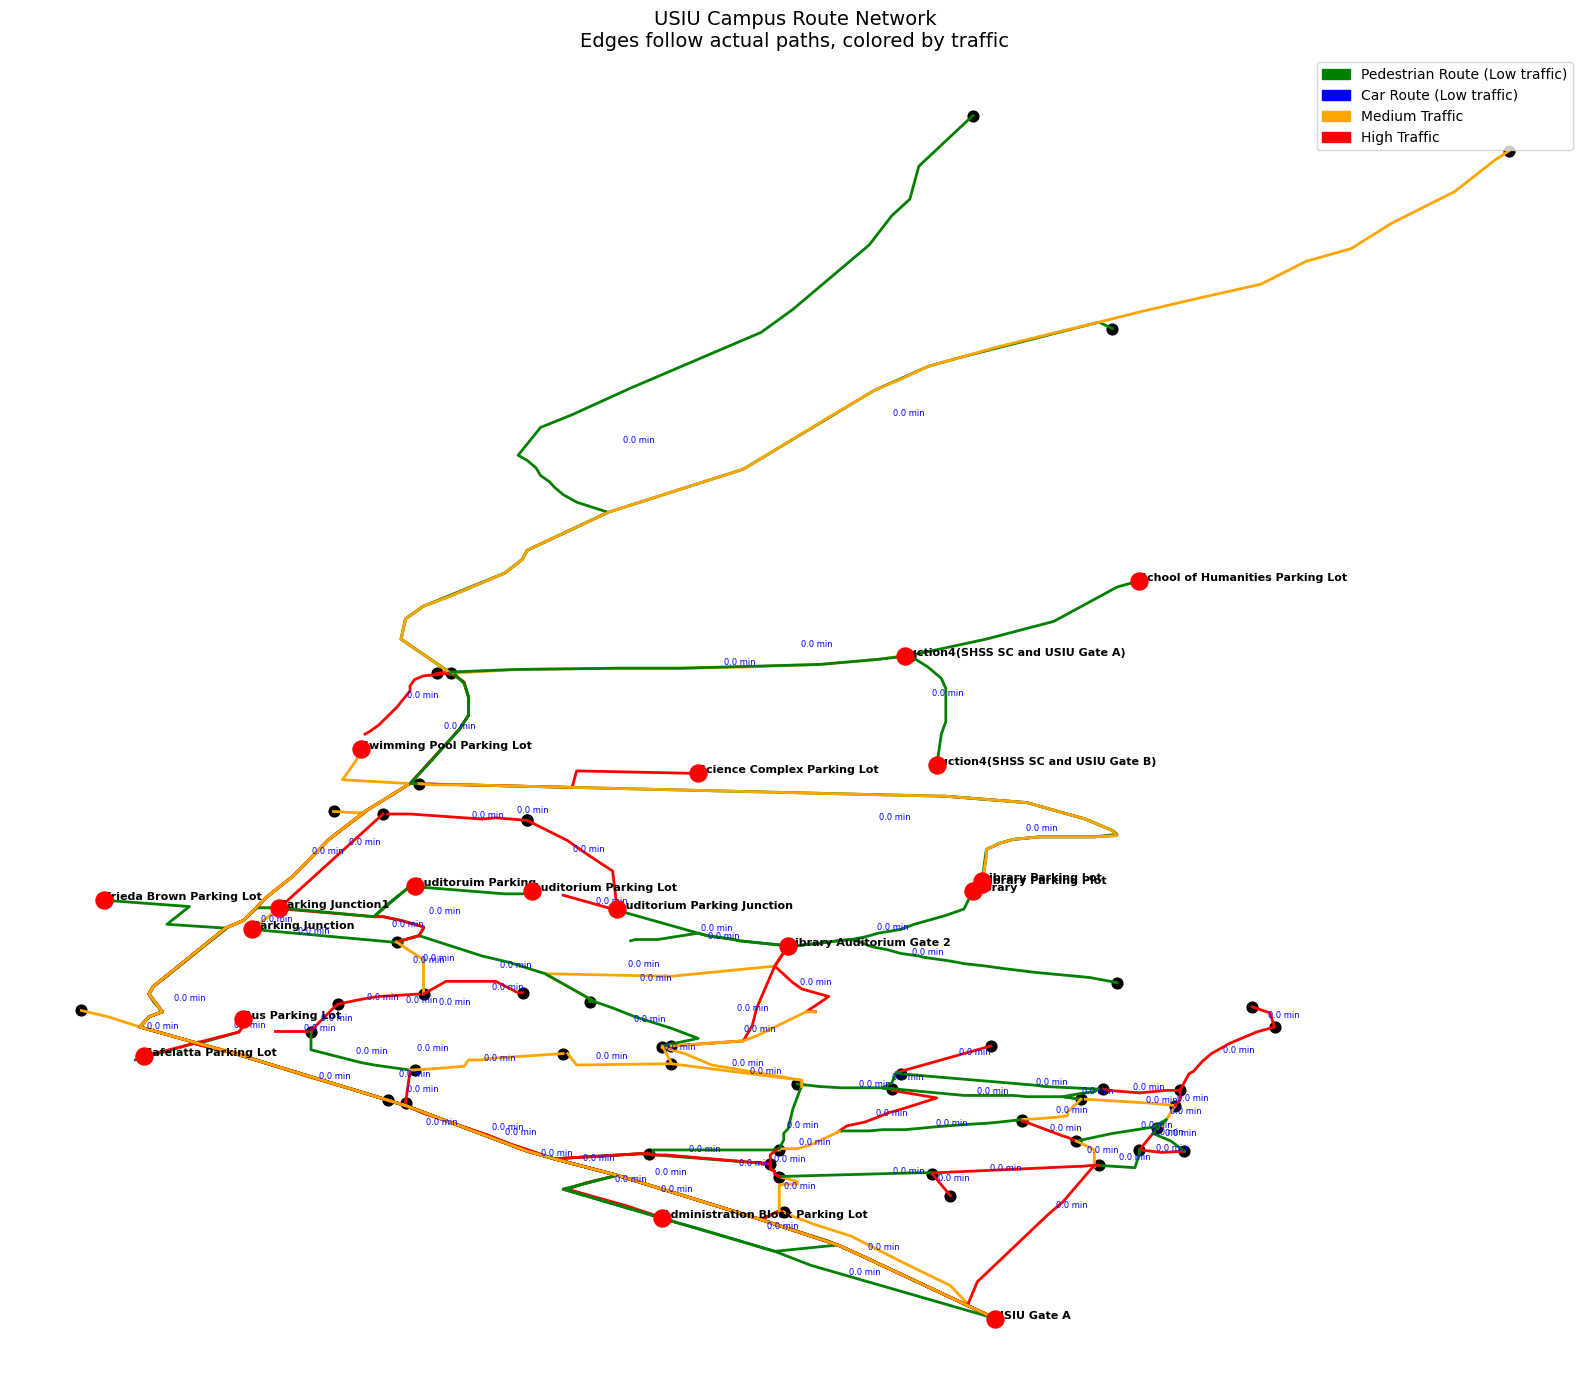

In [ ]:

# === Build Graph ===
G = nx.Graph()
for _, row in gdf.iterrows():
    start = row["start_name"]
    end = row["end_name"]
    coords = list(row.geometry.coords)
    start_coord = coords[0]
    end_coord = coords[-1]

    # Add nodes with positions
    G.add_node(start, pos=start_coord)
    G.add_node(end, pos=end_coord)

    # Assign average speed based on route type
    route_type = row.get("type", "pedestrian")
    avg_speed = 1.5 if route_type == "pedestrian" else 10  # m/s

    # Simulate traffic factor
    traffic_levels = {"low": 1.0, "medium": 1.3, "high": 1.6}
    traffic = random.choice(list(traffic_levels.keys()))
    traffic_factor = traffic_levels[traffic]

    # Add edge with metadata, including full geometry
    G.add_edge(
        start,
        end,
        weight=row.geometry.length,
        type=route_type,
        geometry=row.geometry,
        avg_speed=avg_speed,
        traffic=traffic,
        traffic_factor=traffic_factor
    )

# === Get Node Positions ===
pos = nx.get_node_attributes(G, 'pos')

# === Plot Graph ===
plt.figure(figsize=(16, 14))

# 1️⃣ Draw edges following actual LineString geometry
for u, v, data in G.edges(data=True):
    geom = data.get('geometry')
    if geom:
        xs, ys = zip(*geom.coords)
        traffic = data.get('traffic', 'low')
        color_map = {'low':'green', 'medium':'orange', 'high':'red'}
        color = color_map.get(traffic, 'green')
        plt.plot(xs, ys, color=color, linewidth=2)

# 2️⃣ Draw nodes on top
node_x = [pos[n][0] for n in G.nodes]
node_y = [pos[n][1] for n in G.nodes]
plt.scatter(node_x, node_y, s=60, color='black')

# 3️⃣ Highlight important nodes
highlight = ["Gate", "Parking", "Library"]
important_nodes = [n for n in G.nodes if any(h in n for h in highlight)]
imp_x = [pos[n][0] for n in important_nodes]
imp_y = [pos[n][1] for n in important_nodes]
plt.scatter(imp_x, imp_y, s=150, color='red', zorder=5)
for n in important_nodes:
    plt.text(pos[n][0], pos[n][1], n, fontsize=8, fontweight='bold', color='black')

# 4️⃣ Annotate edges with estimated travel time
for u, v, data in G.edges(data=True):
    geom = data.get('geometry')
    if geom:
        xs, ys = zip(*geom.coords)
        mid_x = sum(xs)/len(xs)
        mid_y = sum(ys)/len(ys)
        distance = data['weight']
        speed = data['avg_speed']
        traffic_factor = data['traffic_factor']
        time_sec = distance / speed * traffic_factor
        time_min = round(time_sec / 60, 1)
        plt.text(mid_x, mid_y, f"{time_min} min", fontsize=6, color='blue')

# 5️⃣ Legend
import matplotlib.patches as mpatches
ped_patch = mpatches.Patch(color='green', label='Pedestrian Route (Low traffic)')
car_patch = mpatches.Patch(color='blue', label='Car Route (Low traffic)')
medium_patch = mpatches.Patch(color='orange', label='Medium Traffic')
high_patch = mpatches.Patch(color='red', label='High Traffic')
plt.legend(handles=[ped_patch, car_patch, medium_patch, high_patch], loc='upper right')

# 6️⃣ Title & display
plt.title("USIU Campus Route Network\nEdges follow actual paths, colored by traffic", fontsize=14)
plt.axis('off')
plt.tight_layout()
plt.show()


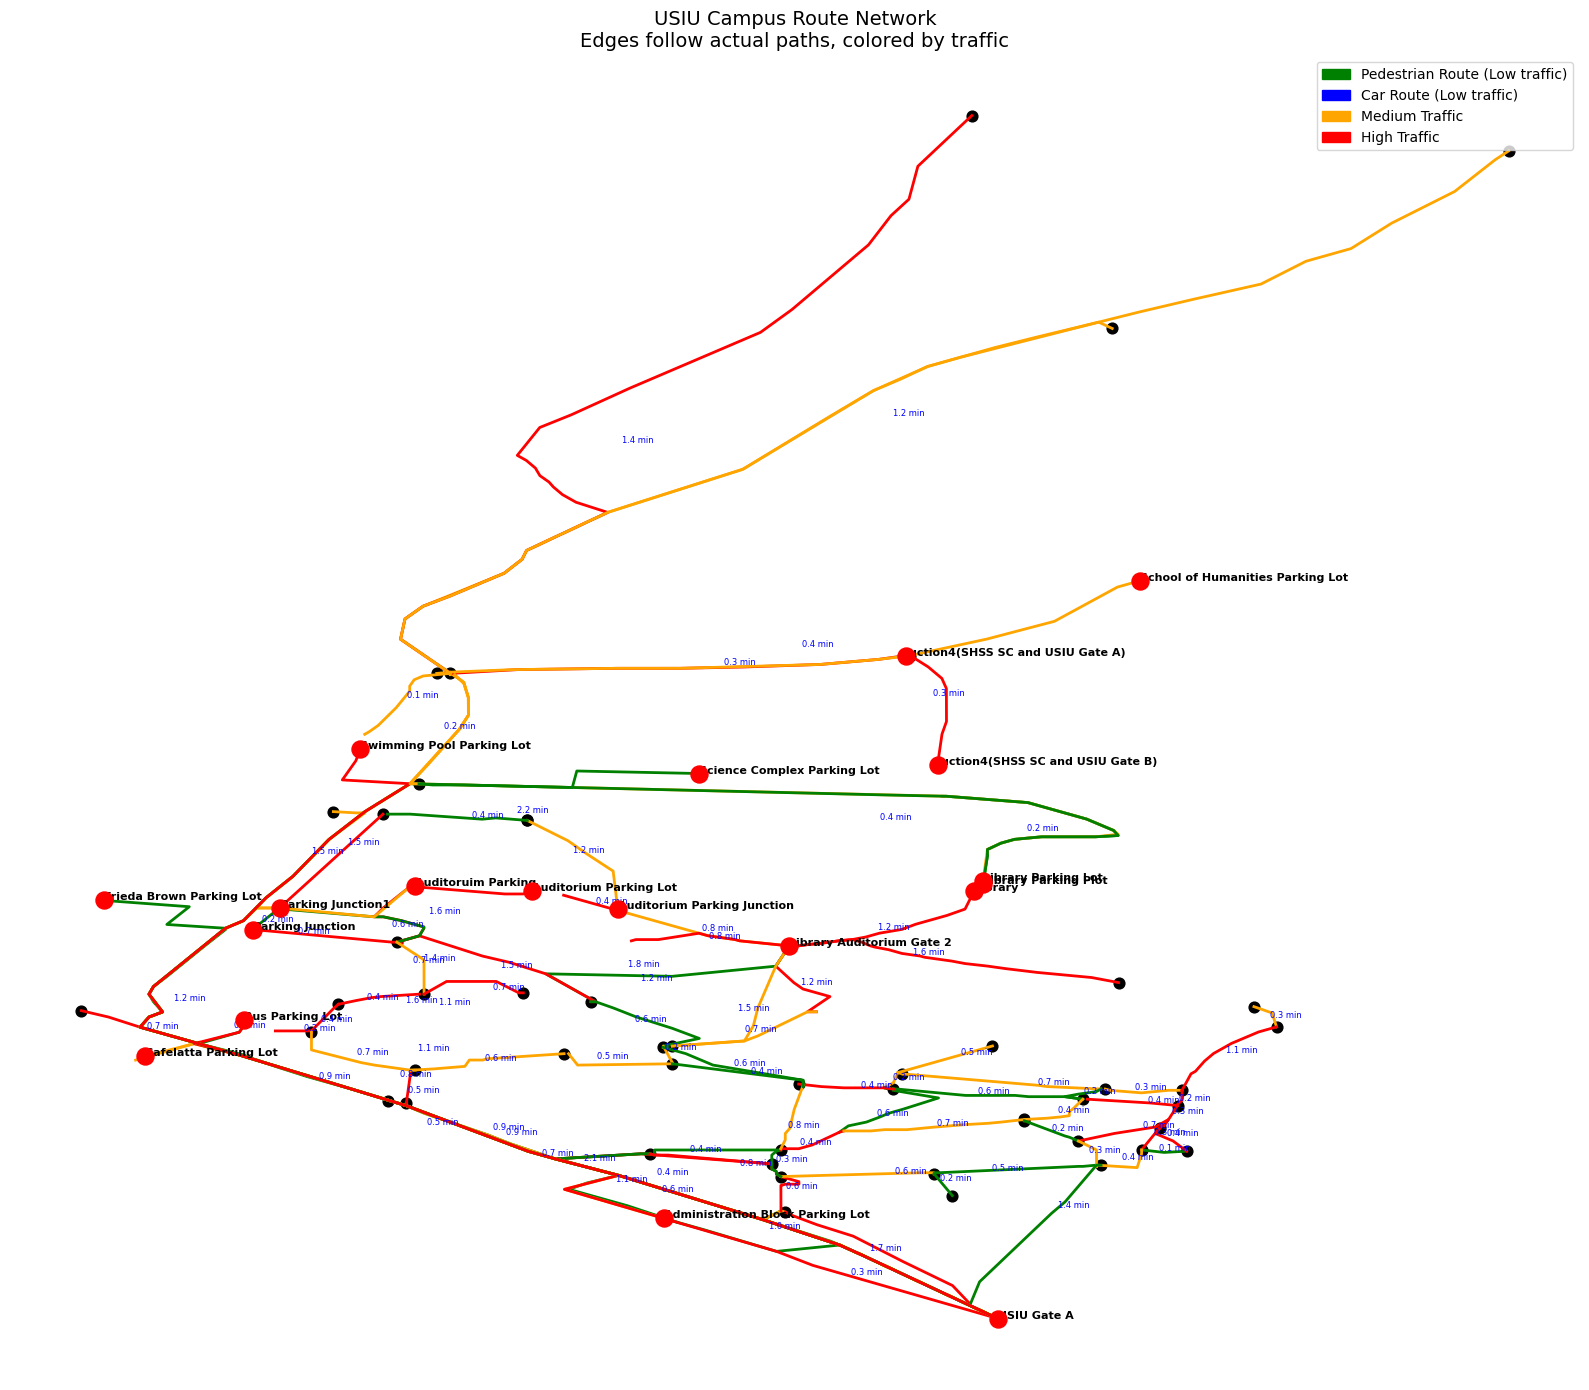

In [5]:
import geopandas as gpd
import networkx as nx
import matplotlib.pyplot as plt
import random

# === Load GeoJSON ===
file_path = r"C:\Users\Admin\OneDrive - United States International University (USIU)\Desktop\USIU MAp Project\data\combined_cleaned_routes.geojson"
gdf = gpd.read_file(file_path)

# === Project to metric CRS (meters) for accurate distances ===
gdf = gdf.to_crs(epsg=32637)  # UTM zone 37N for Nairobi area

# === Build Graph ===
G = nx.Graph()
for _, row in gdf.iterrows():
    start = row["start_name"]
    end = row["end_name"]
    coords = list(row.geometry.coords)
    start_coord = coords[0]
    end_coord = coords[-1]

    # Add nodes with positions
    G.add_node(start, pos=start_coord)
    G.add_node(end, pos=end_coord)

    # Assign average speed based on route type
    route_type = row.get("type", "pedestrian")
    avg_speed = 1.5 if route_type == "pedestrian" else 10  # m/s

    # Simulate traffic factor
    traffic_levels = {"low": 1.0, "medium": 1.3, "high": 1.6}
    traffic = random.choice(list(traffic_levels.keys()))
    traffic_factor = traffic_levels[traffic]

    # Edge length in meters (CRS already in meters)
    distance_m = row.geometry.length

    # Add edge with metadata, including full geometry
    G.add_edge(
        start,
        end,
        weight=distance_m,
        type=route_type,
        geometry=row.geometry,
        avg_speed=avg_speed,
        traffic=traffic,
        traffic_factor=traffic_factor
    )

# === Get Node Positions ===
pos = nx.get_node_attributes(G, 'pos')

# === Plot Graph ===
plt.figure(figsize=(16, 14))

# 1️⃣ Draw edges following actual LineString geometry
for u, v, data in G.edges(data=True):
    geom = data.get('geometry')
    if geom:
        xs, ys = zip(*geom.coords)
        traffic = data.get('traffic', 'low')
        color_map = {'low':'green', 'medium':'orange', 'high':'red'}
        color = color_map.get(traffic, 'green')
        plt.plot(xs, ys, color=color, linewidth=2)

# 2️⃣ Draw nodes
node_x = [pos[n][0] for n in G.nodes]
node_y = [pos[n][1] for n in G.nodes]
plt.scatter(node_x, node_y, s=60, color='black')

# 3️⃣ Highlight important nodes
highlight = ["Gate", "Parking", "Library"]
important_nodes = [n for n in G.nodes if any(h in n for h in highlight)]
imp_x = [pos[n][0] for n in important_nodes]
imp_y = [pos[n][1] for n in important_nodes]
plt.scatter(imp_x, imp_y, s=150, color='red', zorder=5)
for n in important_nodes:
    plt.text(pos[n][0], pos[n][1], n, fontsize=8, fontweight='bold', color='black')

# 4️⃣ Annotate edges with estimated travel time
for u, v, data in G.edges(data=True):
    geom = data.get('geometry')
    if geom:
        xs, ys = zip(*geom.coords)
        mid_x = sum(xs)/len(xs)
        mid_y = sum(ys)/len(ys)
        distance = data['weight']  # meters
        speed = data['avg_speed']  # m/s
        traffic_factor = data['traffic_factor']
        time_sec = distance / speed * traffic_factor
        time_min = round(time_sec / 60, 1)
        plt.text(mid_x, mid_y, f"{time_min} min", fontsize=6, color='blue')

# 5️⃣ Legend
import matplotlib.patches as mpatches
ped_patch = mpatches.Patch(color='green', label='Pedestrian Route (Low traffic)')
car_patch = mpatches.Patch(color='blue', label='Car Route (Low traffic)')
medium_patch = mpatches.Patch(color='orange', label='Medium Traffic')
high_patch = mpatches.Patch(color='red', label='High Traffic')
plt.legend(handles=[ped_patch, car_patch, medium_patch, high_patch], loc='upper right')

# 6️⃣ Title & display
plt.title("USIU Campus Route Network\nEdges follow actual paths, colored by traffic", fontsize=14)
plt.axis('off')
plt.tight_layout()
plt.show()


#### Highlight from USIU Gate A to School of Graduates

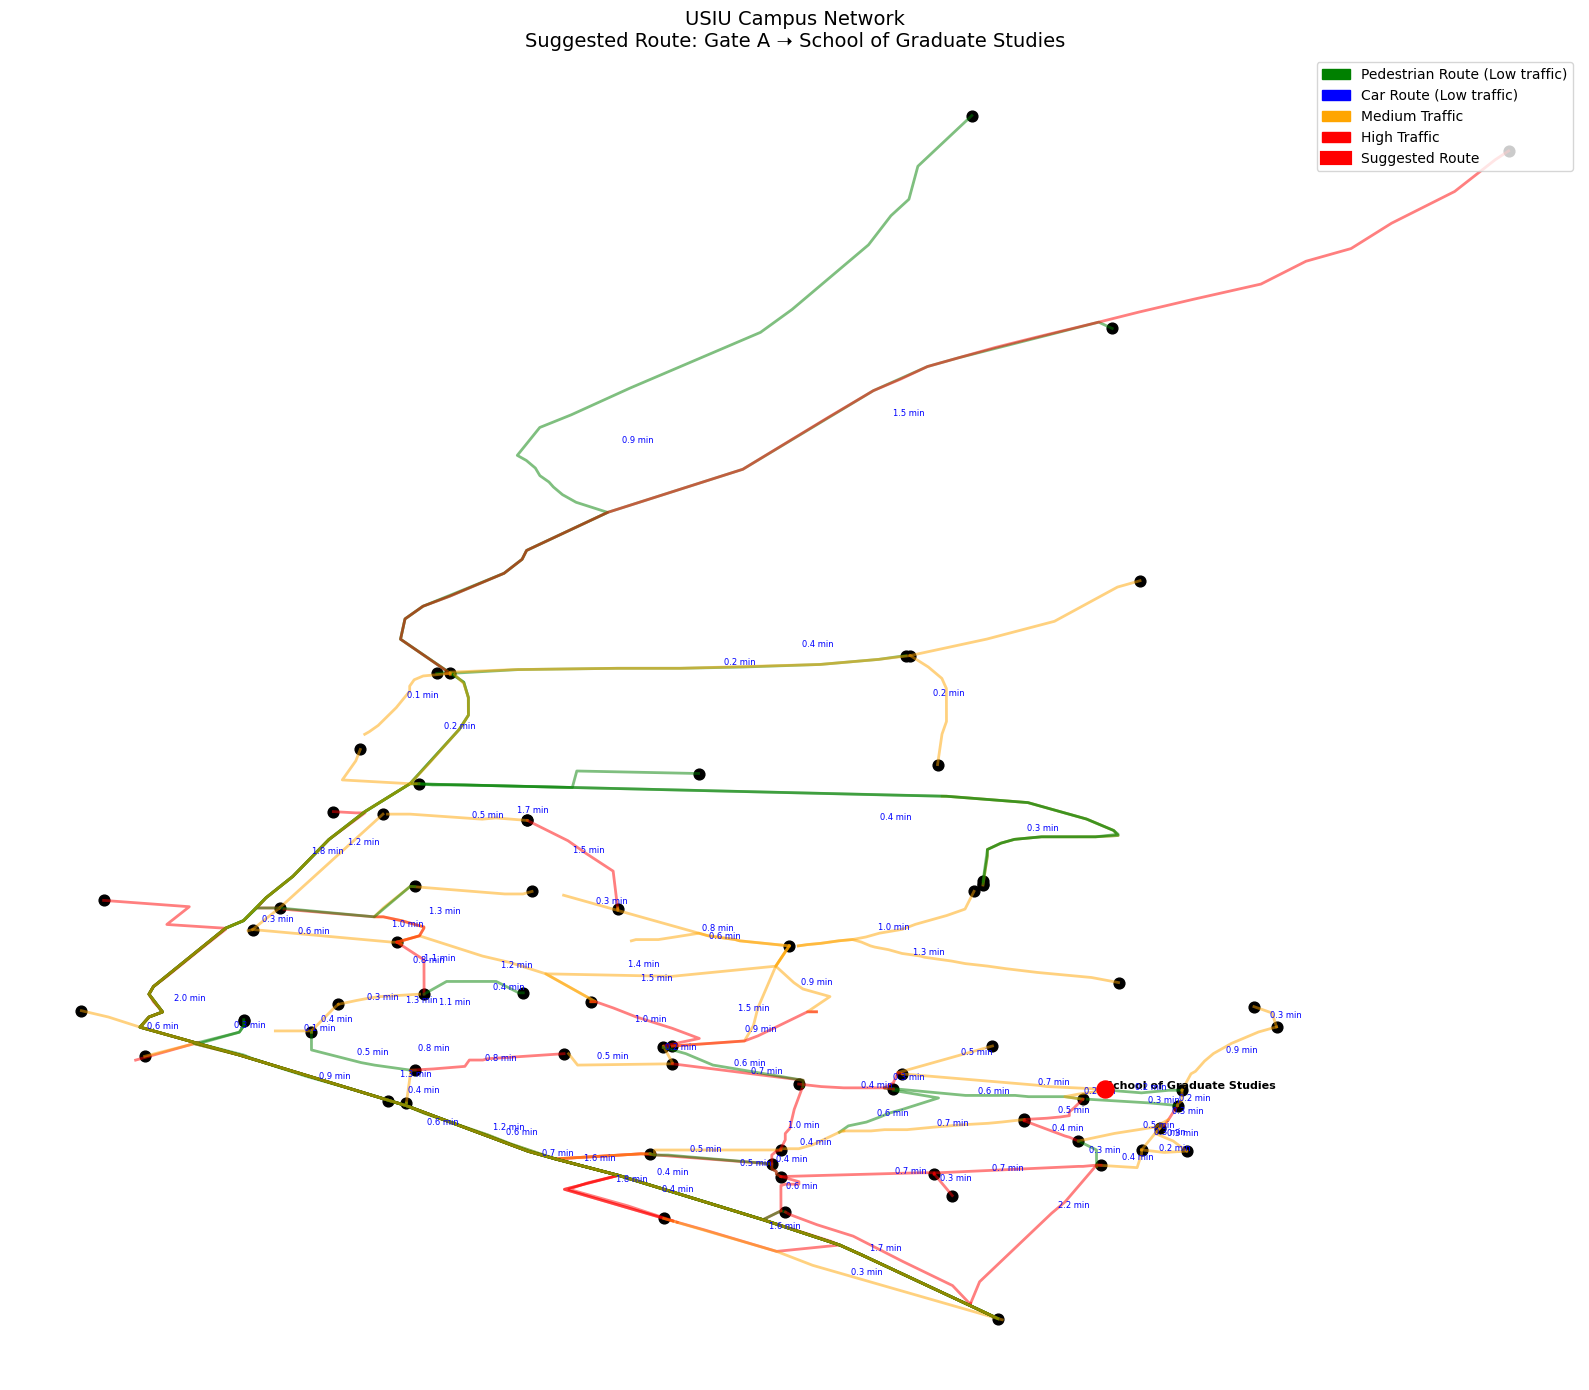

In [ ]:
# === Build Graph ===
G = nx.Graph()
for _, row in gdf.iterrows():
    start = row["start_name"]
    end = row["end_name"]
    coords = list(row.geometry.coords)
    start_coord = coords[0]
    end_coord = coords[-1]

    G.add_node(start, pos=start_coord)
    G.add_node(end, pos=end_coord)

    route_type = row.get("type", "pedestrian")
    avg_speed = 1.5 if route_type == "pedestrian" else 10  # m/s
    traffic_levels = {"low": 1.0, "medium": 1.3, "high": 1.6}
    traffic = random.choice(list(traffic_levels.keys()))
    traffic_factor = traffic_levels[traffic]

    distance_m = row.geometry.length

    G.add_edge(
        start,
        end,
        weight=distance_m,
        type=route_type,
        geometry=row.geometry,
        avg_speed=avg_speed,
        traffic=traffic,
        traffic_factor=traffic_factor
    )

# === Node positions ===
pos = nx.get_node_attributes(G, 'pos')

# === Suggested Route Example ===
user_route = ["Gate A", "School of Graduate Studies"]

# === Plot Network ===
plt.figure(figsize=(16, 14))

# Draw all edges colored by traffic
for u, v, data in G.edges(data=True):
    geom = data.get('geometry')
    if geom:
        xs, ys = zip(*geom.coords)
        traffic = data.get('traffic', 'low')
        color_map = {'low':'green', 'medium':'orange', 'high':'red'}
        color = color_map.get(traffic, 'green')
        plt.plot(xs, ys, color=color, linewidth=2, alpha=0.5)

# Draw nodes
node_x = [pos[n][0] for n in G.nodes]
node_y = [pos[n][1] for n in G.nodes]
plt.scatter(node_x, node_y, s=60, color='black')

# Highlight important nodes
highlight = ["Gate A", "School of Graduate Studies"]
important_nodes = [n for n in G.nodes if n in highlight]
imp_x = [pos[n][0] for n in important_nodes]
imp_y = [pos[n][1] for n in important_nodes]
plt.scatter(imp_x, imp_y, s=150, color='red', zorder=5)
for n in important_nodes:
    plt.text(pos[n][0], pos[n][1], n, fontsize=8, fontweight='bold', color='black')

# Overlay suggested route in RED
for i in range(len(user_route)-1):
    u, v = user_route[i], user_route[i+1]
    if G.has_edge(u, v):
        geom = G[u][v]["geometry"]
        xs, ys = zip(*geom.coords)
        plt.plot(xs, ys, color='red', linewidth=4, alpha=0.8)

# Annotate edges with travel time (minutes)
for u, v, data in G.edges(data=True):
    geom = data.get('geometry')
    if geom:
        xs, ys = zip(*geom.coords)
        mid_x = sum(xs)/len(xs)
        mid_y = sum(ys)/len(ys)
        distance = data['weight']
        speed = data['avg_speed']
        traffic_factor = data['traffic_factor']
        time_sec = distance / speed * traffic_factor
        time_min = round(time_sec / 60, 1)
        plt.text(mid_x, mid_y, f"{time_min} min", fontsize=6, color='blue')

# Legend
import matplotlib.patches as mpatches
ped_patch = mpatches.Patch(color='green', label='Pedestrian Route (Low traffic)')
car_patch = mpatches.Patch(color='blue', label='Car Route (Low traffic)')
medium_patch = mpatches.Patch(color='orange', label='Medium Traffic')
high_patch = mpatches.Patch(color='red', label='High Traffic')
user_patch = mpatches.Patch(color='red', label='Suggested Route', linewidth=3)
plt.legend(handles=[ped_patch, car_patch, medium_patch, high_patch, user_patch], loc='upper right')

plt.title("USIU Campus Network\nSuggested Route: Gate A ➝ School of Graduate Studies", fontsize=14)
plt.axis('off')
plt.tight_layout()
plt.show()

